# Alucar -  Analisando as vendas

In [1]:
import pandas as pd

In [3]:
alucar = pd.read_csv('dados/alucar.csv')
alucar.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dados/alucar.csv'

In [61]:
# verificando o tamanho dos dados
alucar.shape

(24, 2)

In [62]:
# verificando se tem algum dado nulo em alguma coluna
alucar.isnull().sum()

mes       0
vendas    0
dtype: int64

In [63]:
# verificando se tem algum dado nulo no total
alucar.isnull().sum().sum()

0

In [64]:
alucar.dtypes #verificando o tipo das variaveis

mes       object
vendas     int64
dtype: object

In [65]:
# mudando o tipo mes object para mes datetime

alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [66]:
# importando o o seaborn e matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

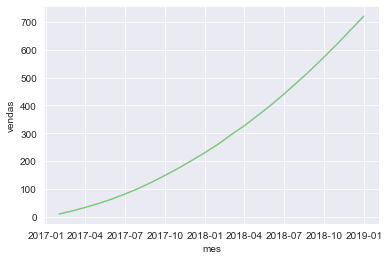

In [67]:
# primeiro plot, saber se as vendas estão aumentando

sns.lineplot(x='mes', y='vendas', data=alucar)


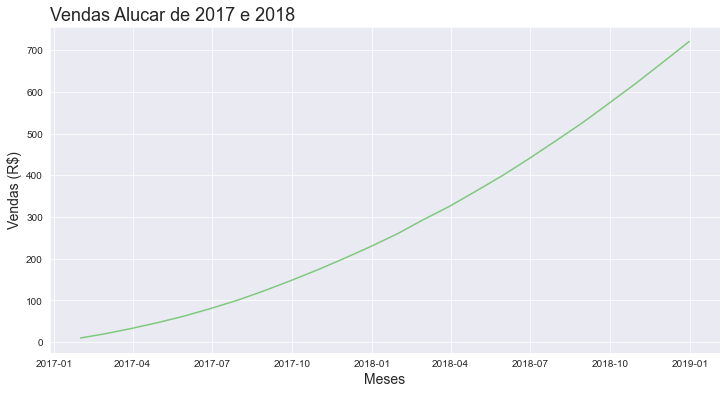

In [68]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [69]:
#criando uma variável para saber a diferença entre os meses exp: mes 2 - mes 1
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


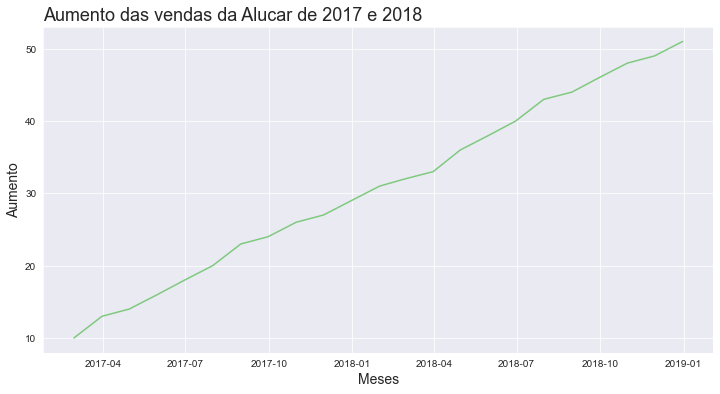

In [70]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [71]:
# criando uma função para futuros graficos

def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

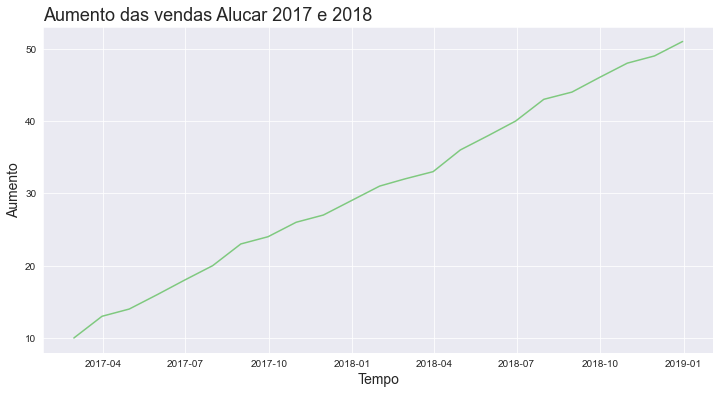

In [72]:
plotar('Aumento das vendas Alucar 2017 e 2018', 'Tempo', 'Aumento',    # testando a função
       'mes', 'aumento', alucar)

In [73]:
alucar['aceleracao'] = alucar['aumento'].diff()   # calculando a aceleração aumento2 -aumento 1
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


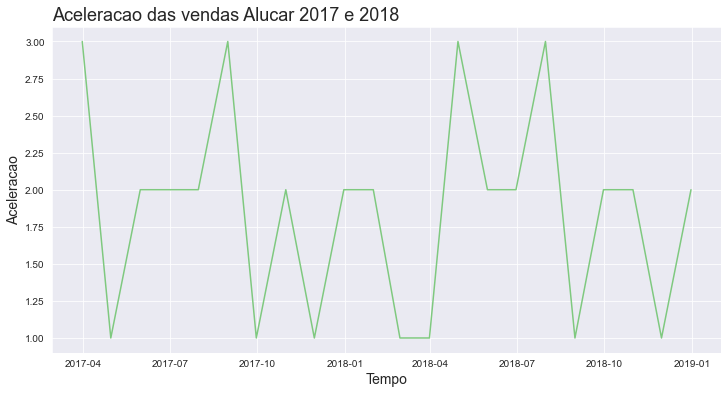

In [74]:
plotar('Aceleracao das vendas Alucar 2017 e 2018', 'Tempo', 'Aceleracao',    # testando a função
       'mes', 'aceleracao', alucar)

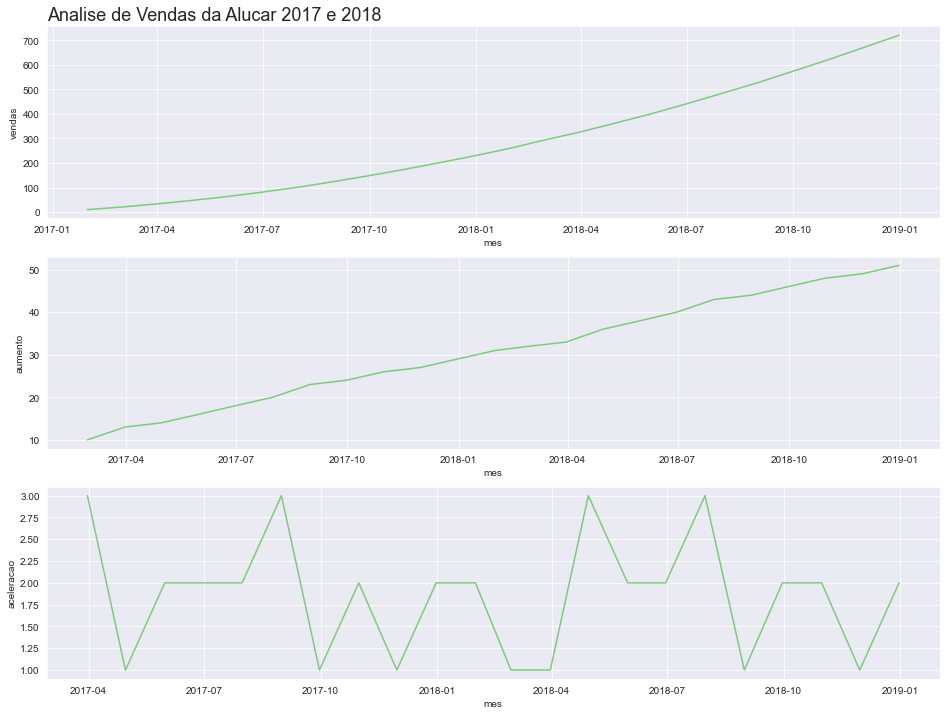

In [75]:
# plotando os 3 graficos em um plot só

plt.figure(figsize = (16, 12))
ax = plt.subplot(3, 1, 1) # comando para dividir os graficos na mesma plotagem
ax.set_title('Analise de Vendas da Alucar 2017 e 2018', fontsize=18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1 ,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1 ,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [76]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3, 1, 1)                             # comando para dividir os graficos na mesma plotagem e criando uma função
    ax.set_title(titulo, fontsize=18, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1 ,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1 ,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

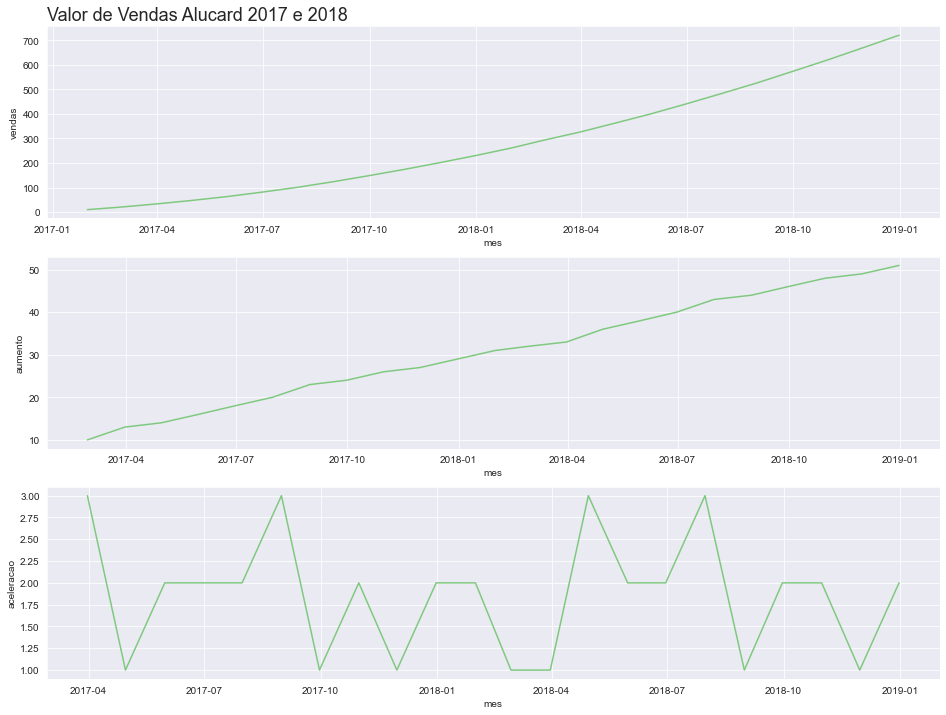

In [77]:
#testando a funcao
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Valor de Vendas Alucard 2017 e 2018')

In [78]:
from pandas.plotting import autocorrelation_plot

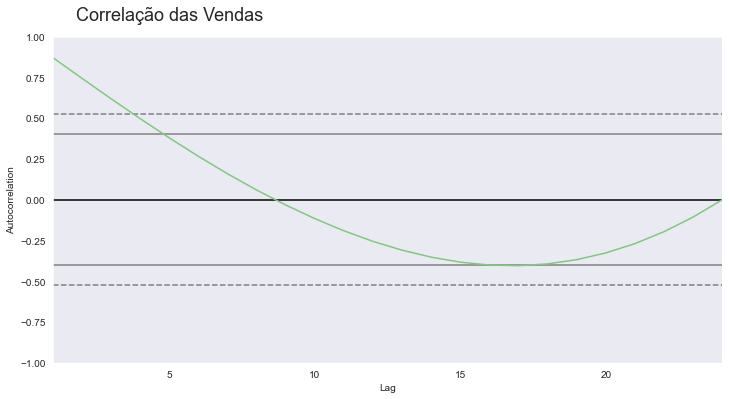

In [79]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax
# eixo x está em meses devido a viavel mes

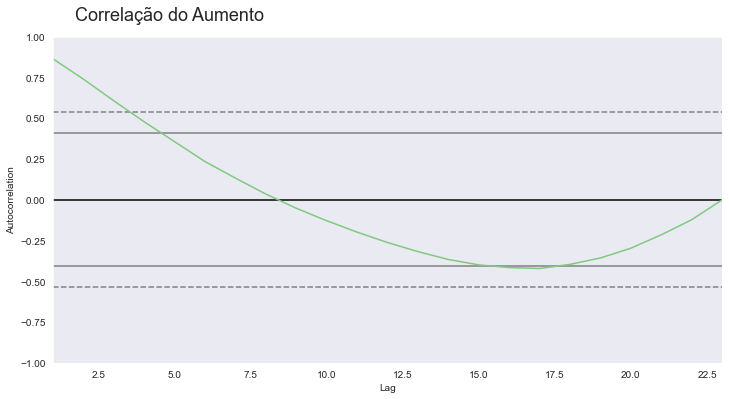

In [80]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])  #precisou tirar o indice 0 pois é NaN
ax = ax

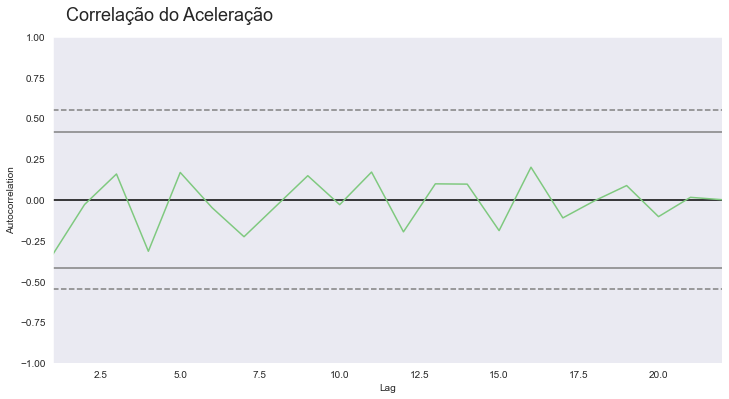

In [81]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do Aceleração', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])  #precisou tirar o indice 0e1 pois é NaN
ax = ax

# analisando outro data set

## alucard 2- analisando assinantes da newslatter

In [82]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [83]:
assinantes.shape

(24, 2)

In [84]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [85]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [86]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [87]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


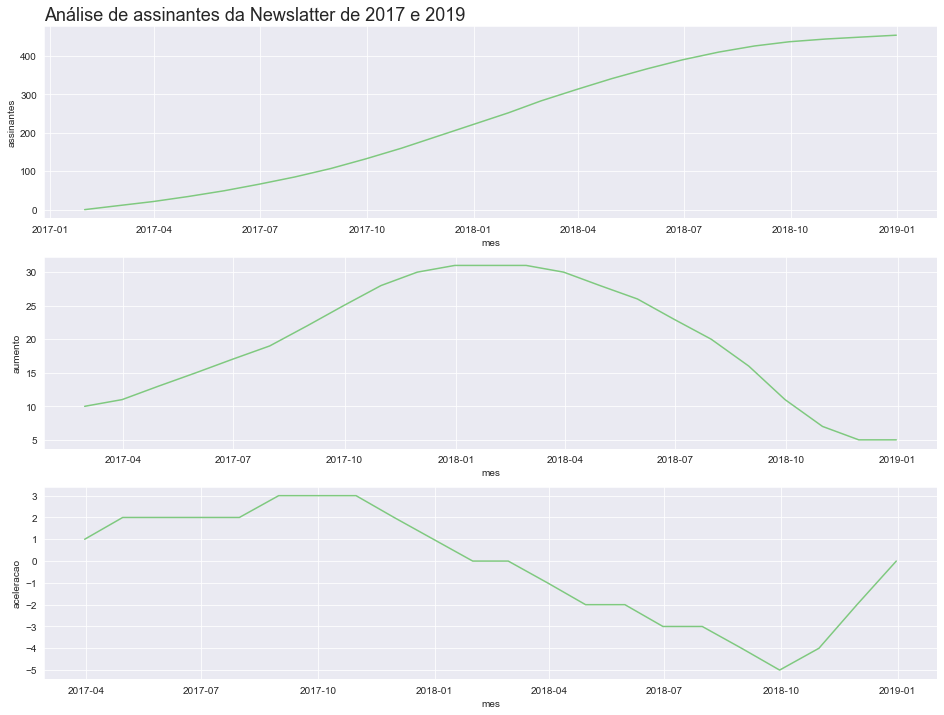

In [88]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da Newslatter de 2017 e 2019')

# analisando outro data frame

In [89]:
chocolura = pd.read_csv('dados/chocolura.csv') # exemplo de empresa que nao dá conta da demanda em determinadas epocas do ano
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [90]:
chocolura.isnull().sum()

mes       0
vendas    0
dtype: int64

In [91]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [92]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [93]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


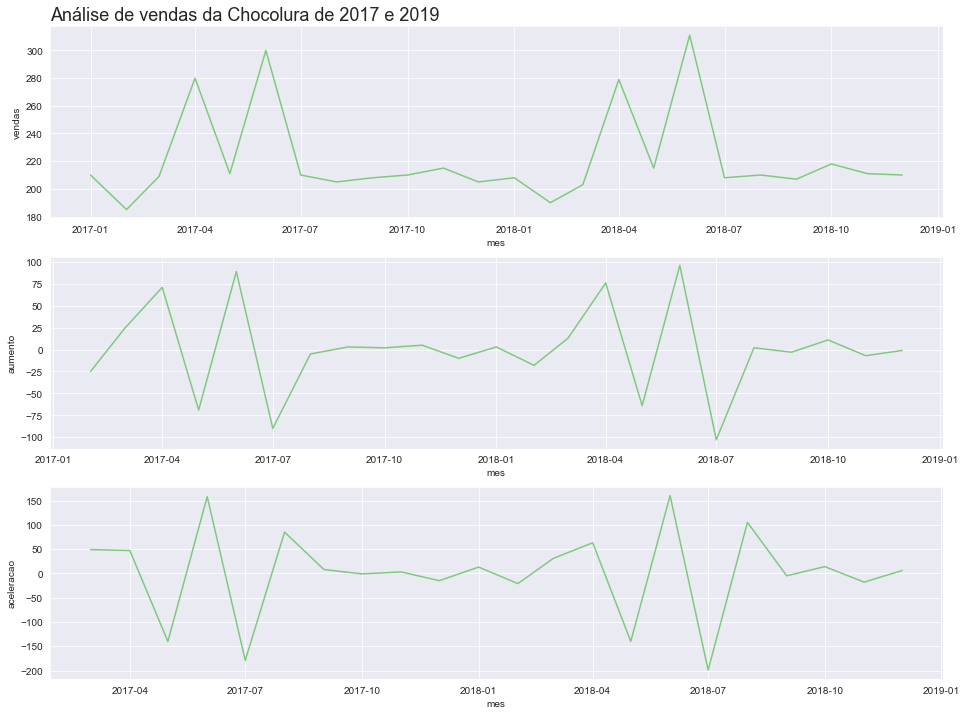

In [94]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 e 2019')

# analisando outro dataframe e sazionalidade

In [95]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [96]:
vendas_por_dia.isnull().sum()

dia       0
vendas    0
dtype: int64

In [97]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [98]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [99]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


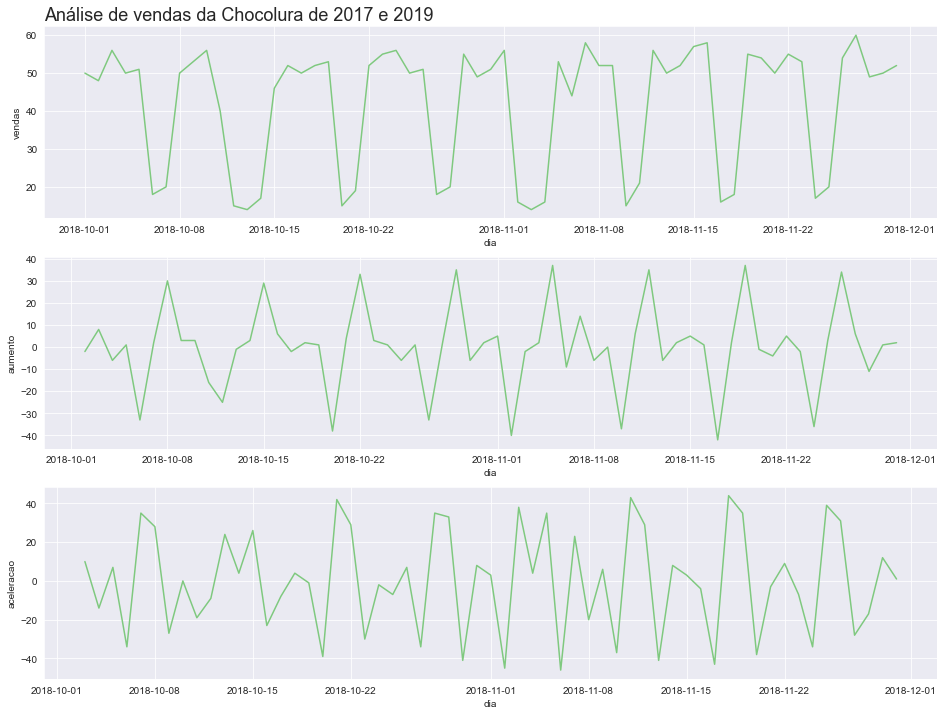

In [100]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas da Chocolura de 2017 e 2019')

# analisando a sazionalidade do dataframe

In [101]:
## criando uma coluna com os dias da semana usando a função dt.day_name()

vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [102]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [103]:
# traduzindo os dias
dias_traduzidos = {'Monday' : 'Segunda', 'Tuesday' : 'Terca', 'Wednesday' : 'Quarta', 'Thursday' : 'Quinta',
                   'Friday' : 'Sexta', 'Saturday' : 'Sabado', 'Sunday' : 'Domingo'}
dias_traduzidos

{'Monday': 'Segunda',
 'Tuesday': 'Terca',
 'Wednesday': 'Quarta',
 'Thursday': 'Quinta',
 'Friday': 'Sexta',
 'Saturday': 'Sabado',
 'Sunday': 'Domingo'}

In [104]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


In [105]:
vendas_por_dia.head(14) # é possivel deduzir que, finais de semana a empresa vende menos e em feriados também

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


In [106]:
# para ter certeza, vamos agrupar os dias e tirar a média

In [107]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round(2)

In [108]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,18.88,3.00,30.75
Quarta,53.11,1.44,2.11
Quinta,51.33,-1.78,-3.22
Sabado,15.88,-27.75,-19.88
Segunda,52.33,33.75,30.75
Sexta,44.56,-6.78,-5.00
Terca,51.67,-0.67,-34.25


## correlação das vendas diárias

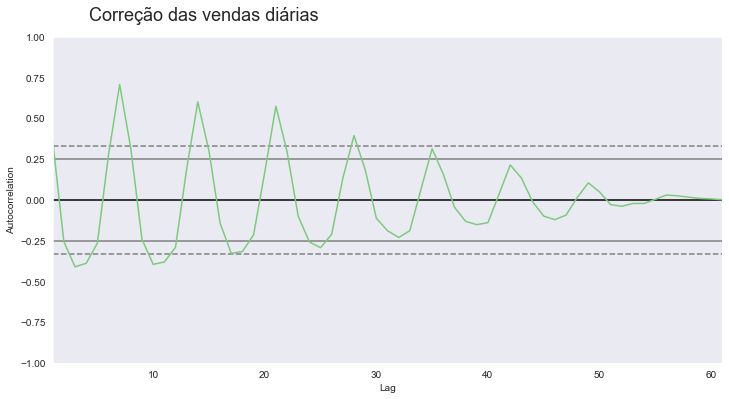

In [109]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correção das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

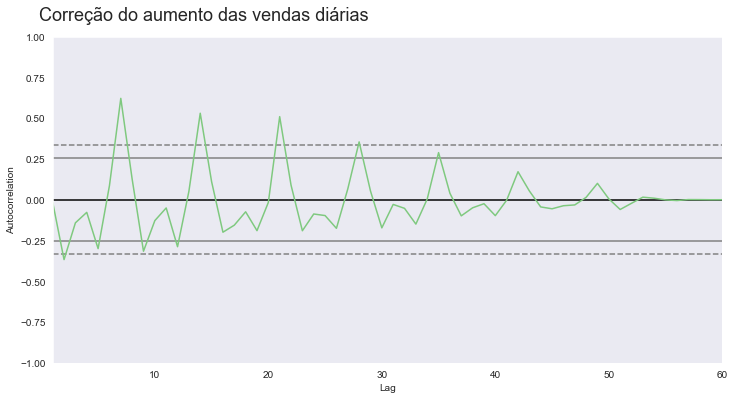

In [110]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correção do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

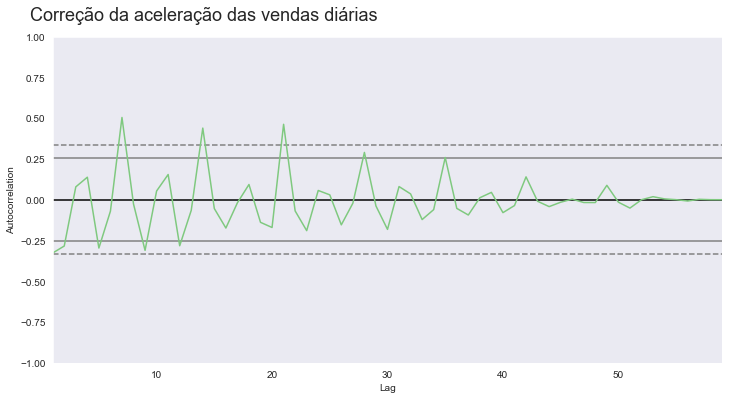

In [111]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correção da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

In [112]:
# analisando outro dataset

In [113]:
# criando uma função para 'tratar' os dados (made by itself)

In [114]:
# para verificar as variáveis

def trat1(dataframe, tipo):
    print(dataframe.isnull().sum())
    print(dataframe.dtypes)
    dataframe[tipo] = pd.to_datetime(dataframe[tipo])
    print(dataframe.dtypes)
    
def trat2(dataframe, tempo, vendas, nome_da_empresa):
    # dataframe[tempo] = pd.to_datetime(dataframe[tempo])
    dataframe['aumento'] = dataframe[vendas].diff()
    dataframe['aceleracao'] = dataframe['aumento'].diff()
    plot_comparacao(tempo, vendas, 'aumento', 'aceleracao', dataframe, 'Análise grafica da {} de 2017 e 2019'.format(nome_da_empresa))

In [115]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [116]:
trat1(cafelura, 'mes')

mes       0
vendas    0
dtype: int64
mes       object
vendas     int64
dtype: object
mes       datetime64[ns]
vendas             int64
dtype: object


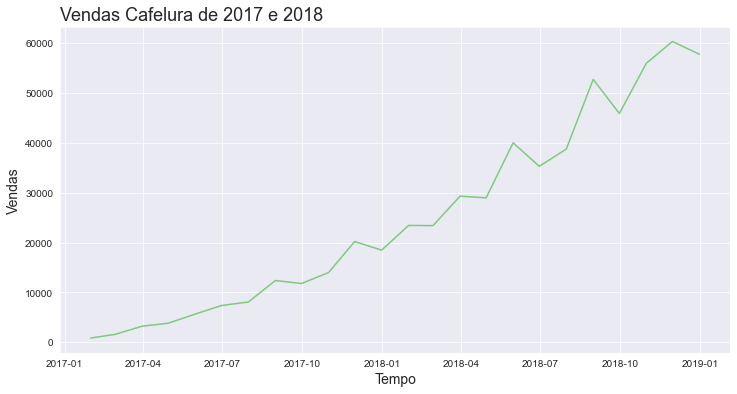

In [117]:
plotar('Vendas Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [118]:
# normalizando o grafico 

In [119]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [120]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [121]:
# divivindo a quantidade de vendas por dias de final de semana de cada mes

In [122]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


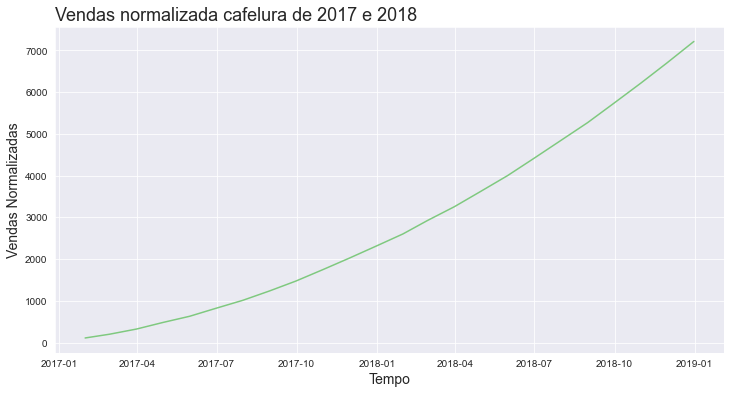

In [123]:
plotar('Vendas normalizada cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

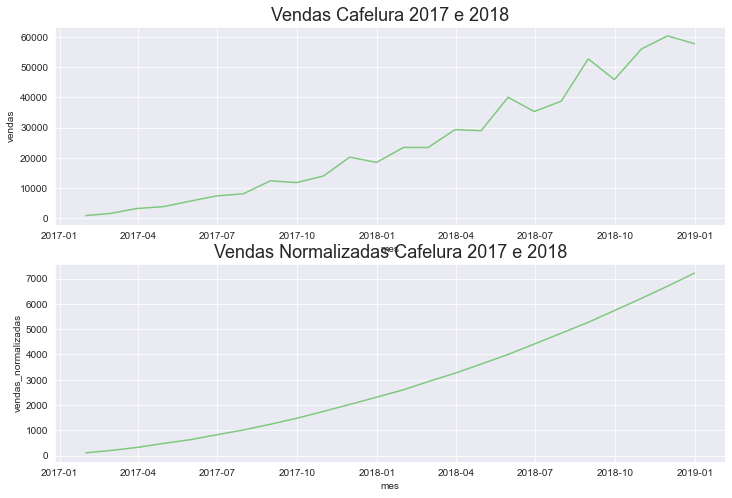

In [124]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# statsmodels

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

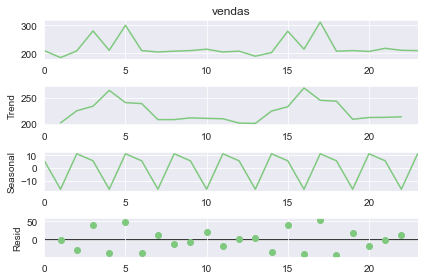

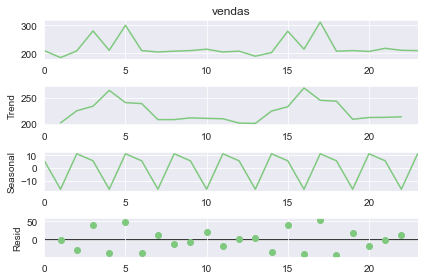

In [126]:
resultado = seasonal_decompose(chocolura['vendas'], period=3) # passar o dado em [] e o period
resultado.plot()

In [127]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [128]:
data = ({'observacao' : observacao,
         'tendencia' : tendencia,
         'sazonalidade' : sazonalidade,
         'ruido' : ruido    
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


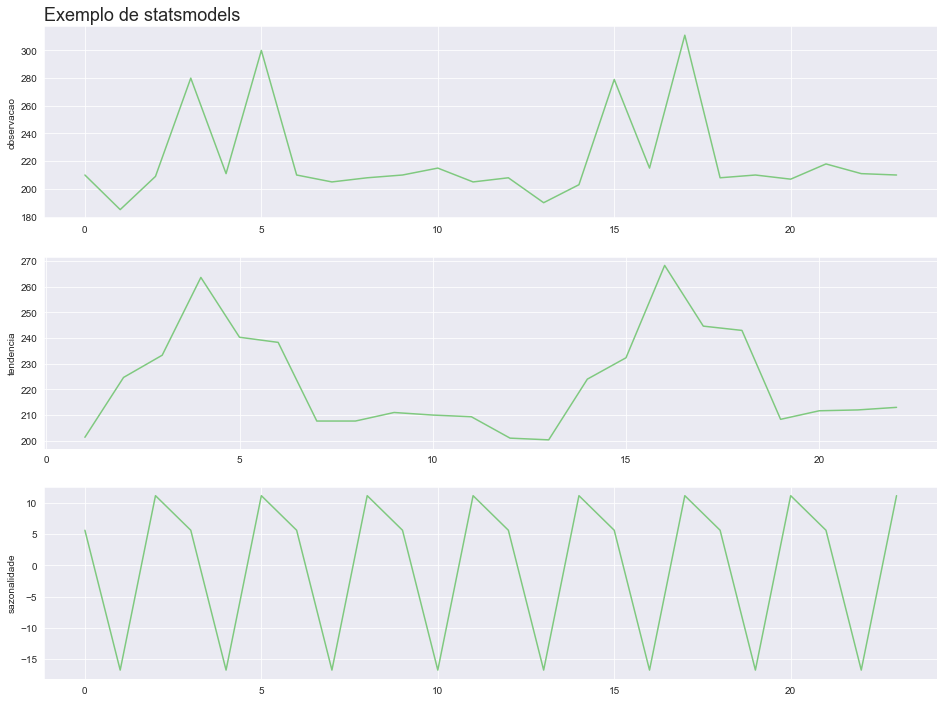

In [129]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de statsmodels')

# analisando outro dataset - alucel analise de vendas

In [130]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [131]:
trat1(alucel, 'dia')

dia       0
vendas    0
dtype: int64
dia        object
vendas    float64
dtype: object
dia       datetime64[ns]
vendas           float64
dtype: object


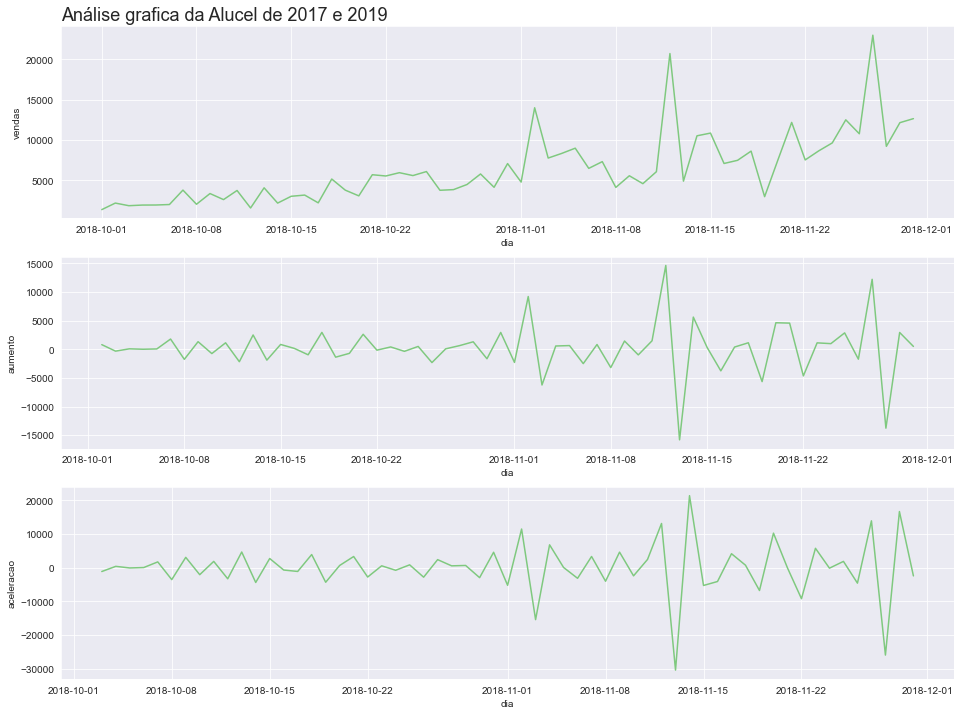

In [133]:
trat2(alucel, 'dia', 'vendas', 'Alucel')

In [134]:
# aplicando normalização / media movel

In [135]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()   # para calcular a media movel utilizar o comando rolling(numero de dias) e mean

In [137]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


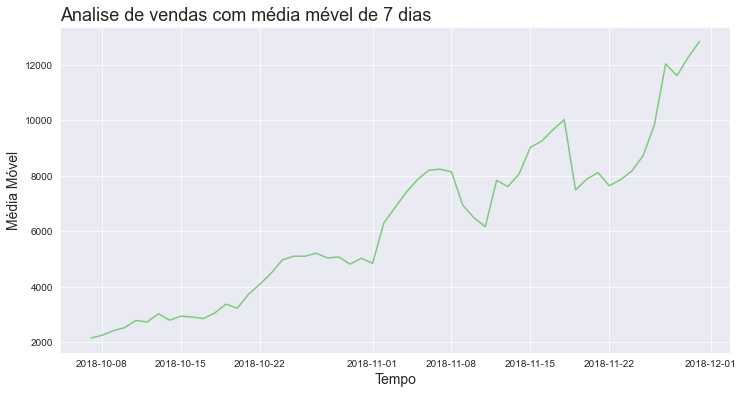

In [138]:
plotar('Analise de vendas com média mével de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', dataset=alucel)

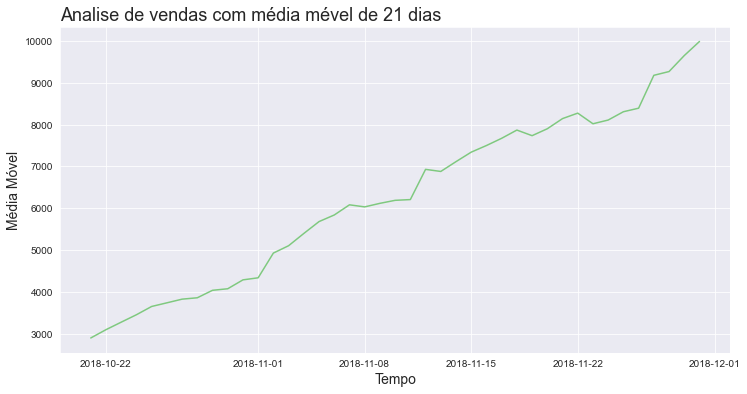

In [140]:
# analisando com a media movel com 21 dias
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean() 
plotar('Analise de vendas com média mével de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', dataset=alucel)

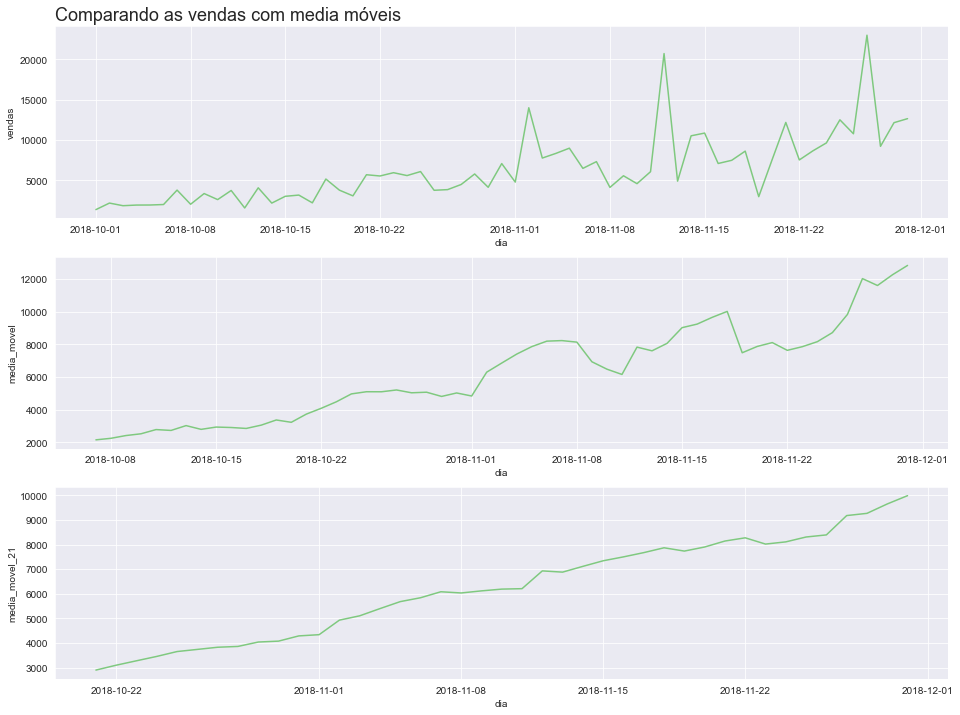

In [142]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com media móveis')